# Self-supervised learning

O *Self-Supervised Learning* (SSL), ou aprendizaxe autosupervisada, é un paradigma da aprendizaxe automática no que un modelo aprende representacións útiles dos datos sen depender de etiquetas proporcionadas por humanos. A diferenza da aprendizaxe supervisada tradicional, que require anotacións manuais custosas, o SSL xera automaticamente sinais de adestramento a partir da estrutura inherente aos datos, situándose nun punto intermedio entre a aprendizaxe supervisada e a non supervisada.

Os Transformers son unha arquitectura de redes neuronais baseada en mecanismos de *self-attention*, que permite un procesamento distribuı́do eficiente e paralelizable, deseñada para procesar datos secuenciais e capturar as relacións entre elementos distantes nunha secuencia. A súa principal vantaxe reside na capacidade de preentrenar modelos lingüísticos xerais a partir de texto non etiquetado mediante técnicas de autosupervisión, que despois poden ser afinados para múltiples tarefas específicas.

Os tipos principais de entrenamento autosupervisado son:

- MLM (Masked Language Modeling): usado en BERT e modelos *encoder-based*.
> **Exemplo**: "O [MASK] correu polo [MASK]."
- CLM (Causal Language Modeling): usado en GPT e modelos *decoder-only*.
> **Exemplo**: "O sol sae polo..."

# Recoñecemento de Entidades Mencionadas

O Recoñecemento de Entidades Mencionadas (NER, *Named-Entity Recognition*) é unha tarefa de extracción de información que ten como obxectivo a detección das entidades mencionadas nun corpus textual e a súa clasificación en clases predefinidas. Esta tarefa foi aplicada a múltiples dominios específicos, como poden ser documentos médicos, xurídicos, de aviación, xenómica ou a extracción de nomes a partir de documentos xornalísticos.

En calquera texto, hai termos que representan entidades con referencia ríxida e singularizable no contexto, coñecidas como entidades mencionadas, que se refiren máis especificamente a persoas, lugares, organizacións, etc., codificadas xeralmente con nomes propios. As entidades mencionadas poden incluír tamén expresións que representan cantidades, moedas, datas, etc.



---



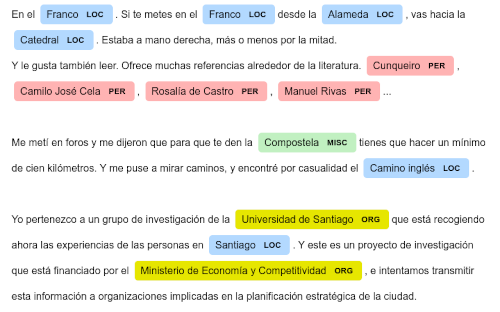


---

As clases semánticas utilizadas en tareas NER de forma tradicional son persona (PER), localización (LOC), organismo (ORG) e miscelánea (MISC), tamén coñecidas como "enamex".

# Dataset

## Formato

O dataset de traballo está en formato IOB2, un esquema de etiquetado moi usado en NER que usa as etiquetas `B` (*Beginning*), `I` (*Inside*) e `O` (*Outside*) para etiquetar os *tokens* nunha frase. No caso de `B` e `I`, van seguidas pola etiqueta de clase (tradicionalmente `LOC`, `PER`, `ORG` e `MISC`).

**Exemplo**

```
A O
capital O
de O
Arxentina B-LOC
é O
Buenos B-LOC
Aires I-LOC
. O

Xiana B-PER
traballa O
na O
Universidade B-ORG
de I-ORG
Vigo I-ORG
. O
```

As etiquetas `I` só poden seguir etiquetas `B` ou `I` da mesma clase de entidade. Isto quere dicir que un *token* etiquetado como `O` non pode ir seguido dun *token* `I`.

Porén, para o *finetuning* usaremos un formato JSONL derivado a partir dos ficheiros IOB2.

```
{
  "tokens": [
      "A", "capital", "de", "Arxentina", "é", "Buenos", "Aires", "."
  ],
  "labels": [
      "O", "O", "O", "B-LOC", "O",  "B-LOC", "I-LOC", "O"
  ]
}
{"tokens": ["Xiana", "traballa", "na", "Universidade", "de", "Vigo", "."],"labels": ["B-PER", "O", "O", "B-ORG", "I-ORG", "I-ORG", "O"]}
```



## Datos

In [ ]:
!wget -c https://fegalaz.usc.es/~sdocio/apau2/p3/data.zip
!unzip -o data.zip
!rm -f data.zip

--2025-04-28 06:35:35--  https://fegalaz.usc.es/~sdocio/apau2/p3/data.zip
Resolving fegalaz.usc.es (fegalaz.usc.es)... 193.144.81.147
Connecting to fegalaz.usc.es (fegalaz.usc.es)|193.144.81.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1170517 (1.1M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   1.12M   926KB/s    in 1.2s    

2025-04-28 06:35:38 (926 KB/s) - ‘data.zip’ saved [1170517/1170517]

Archive:  data.zip
   creating: data/
  inflating: data/ner-gl.test.json   
  inflating: data/ner-gl.train.json  
  inflating: data/ner-gl.test.csv    
  inflating: data/ner-gl.train.csv   
  inflating: data/ner-gl.valid.csv   
  inflating: data/ner-gl.valid.json  
  inflating: requirements.txt        
  inflating: convert.py              
  inflating: run_ner.py              
  inflating: run_train.sh            


Na carpeta `data` están as particións de *test*, *train* e *validation* do corpus SLI-NER, nos formatos IOB2 e JSONL.

O script `convert.py` permite a conversión de formatos de IOB2 a JSONL.

```sh
python convert.py ner-gl.train.csv ner-gl.train.json
```

In [ ]:
!head data/ner-gl.valid.csv

In [ ]:
!head -3 data/ner-gl.valid.json

# Dependencias

In [ ]:
pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.9 MB/s eta 0:00:00


# Fine-tuning

O *fine-tuning* (ou afinamento) permite adaptar un modelo preentrenado a unha tarefa específica mediante un conxunto de datos especializado. Este proceso aproveita as representacións xerais aprendidas durante o preentrenamento (normalmente mediante *self-supervised learning*) e e axusta os parámetros do modelo usando datos etiquetados do dominio de interese, o que require menos exemplos ca un adestramento desde cero. Deste xeito, combínase a eficiencia do coñecemento adquirido previamente coa precisión necesaria para a aplicación concreta.

A continuación adaptaremos dous modelos baseados na arquitectura Transformer usando un conxunto de datos anotado para a tarefa específica de recoñecemento de entidades mencionadas (NER).

In [ ]:
!cat run_train.sh

## xlm-roberta-base

[XLM-RoBERTa-base](https://huggingface.co/FacebookAI/xlm-roberta-base) é un modelo multilingüe baseado na arquitectura Transformer con 279M parámetros, e que foi adestrado empregando 2.5T de texto en 100 linguas diferentes.


In [ ]:
!bash run_train.sh FacebookAI/xlm-roberta-base

## bert-small-gl-cased

[bert-small-gl-cased](https://huggingface.co/marcosgg/bert-small-gl-cased) é un modelo baseado na arquitectura Transformer, con 83M parámetros e adestrado cun corpus de 633 millóns de tokens en galego. Existe tamén un modelo maior, [bert-base-gl-cased](https://huggingface.co/marcosgg/bert-base-gl-cased), adestrado co mesmo corpus pero con 177M parámetros.

In [ ]:
!bash run_train.sh marcosgg/bert-small-gl-cased

# Avaliación

In [ ]:
import json
import sys
from itertools import chain
import matplotlib.pyplot as plt
import seaborn as sns
from seqeval.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
TAGS = [
    'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC', 'B-ORG', 'I-ORG', 'B-PER', 'I-PER'
]


def flatten(nested_dataset: list) -> list:
    """Takes a nested list and returns it unnested"""
    return list(chain.from_iterable(nested_dataset))


def fix(data1, data2) -> None:
    skip = 0
    try:
        for i in range(len(data1)-1, -1, -1):
            if len(data1[i]) != len(data2[i]):
                del data1[i]
                del data2[i]
                skip += 1
    except IndexError as exc:
        raise IndexError("datasets with different sizes") from exc


def read_predictions(ifile: str) -> list:
    raw_sentence = ""
    try:
        with open(ifile, encoding="utf-8") as fhi:
            return [line.strip().split(" ") for line in fhi]
    except IOError:
        print("Unable to read file: " + ifile)
        sys.exit()


def read_ground_truth(ifile: str) -> list:
    raw_sentence = ""
    try:
        with open(ifile, encoding="utf-8") as fhi:
            return [json.loads(line)["labels"] for line in fhi]
    except IOError:
        print("Unable to read file: " + ifile)
        sys.exit()

In [ ]:
golden_xlm = read_ground_truth("data/ner-gl.test.json")
y_pred_xlm = read_predictions("drive/MyDrive/apau2/models/xlm-roberta-base-ner/predictions.txt")
fix(golden_xlm, y_pred_xlm)

In [ ]:
cmatrix_xlm = confusion_matrix(
    flatten(golden_xlm), flatten(y_pred_xlm), normalize="true")

plt.figure(figsize=(7, 7))
plot = sns.heatmap(cmatrix_xlm, annot=True, fmt=".3f", cmap="GnBu")
plot.set_xlabel('Predicted Values')
plot.set_ylabel('Actual Values')
plot.xaxis.set_ticklabels(TAGS + ["O"])
plot.yaxis.set_ticklabels(TAGS + ["O"])
plot.tick_params(axis="x", rotation=20)
plot.tick_params(axis="y", rotation=20)
plot.set_title("xlm-roberta-base-ner")
plt.show()

In [ ]:
golden_bert = read_ground_truth("data/ner-gl.test.json")
y_pred_bert = read_predictions("drive/MyDrive/apau2/models/bert-small-gl-cased-ner/predictions.txt")
fix(golden_bert, y_pred_bert)

In [ ]:
cmatrix_bert = confusion_matrix(
    flatten(golden_bert), flatten(y_pred_bert), normalize="true")

plt.figure(figsize=(7, 7))
plot = sns.heatmap(cmatrix_bert, annot=True, fmt=".3f", cmap="GnBu")
plot.xaxis.set_ticklabels(TAGS + ["O"])
plot.yaxis.set_ticklabels(TAGS + ["O"])
plot.tick_params(axis="x", rotation=20)
plot.tick_params(axis="y", rotation=20)
plot.set_title("bert-small-gl-cased-ner")
plt.show()

In [ ]:
eval_results_xlm = classification_report(
    golden_xlm,
    y_pred_xlm,
    digits=3,
    output_dict=True)

eval_results_bert = classification_report(
    golden_bert,
    y_pred_bert,
    digits=3,
    output_dict=True)

print("XLM-ROBERTA-BASE-NER")
print(f"precision: {eval_results_xlm['weighted avg']['precision']:.3f}")
print(f"recall: {eval_results_xlm['weighted avg']['recall']:.3f}")
print(f"f1-score: {eval_results_xlm['weighted avg']['f1-score']:.3f}")
print("----------------------------------------")
print("BERT-SMALL-GL-CASED-NER")
print(f"precision: {eval_results_bert['weighted avg']['precision']:.3f}")
print(f"recall: {eval_results_bert['weighted avg']['recall']:.3f}")
print(f"f1-score: {eval_results_bert['weighted avg']['f1-score']:.3f}")